In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

sns.set()
sns.set_style("white")

In [2]:
variable_measurements_df = pd.read_csv("data/variable_measurements.csv", sep="\t")

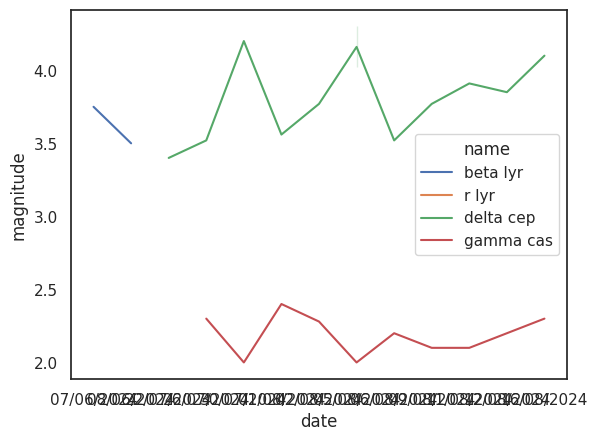

In [3]:
g = sns.lineplot(
      data=variable_measurements_df,
      x="date",
      y="magnitude",
      hue="name"
      )

In [4]:
variable_measurements_df["datetime"] = [
    datetime.datetime.strptime(d+" "+t, "%d/%m/%Y %H:%M") 
    for d,t in zip(variable_measurements_df["date"],variable_measurements_df["time"])
]

In [5]:
variable_measurements_df["julian_date"] = [d.to_julian_date() for d in variable_measurements_df["datetime"]]

In [6]:
variable_measurements_df

,name,date,time,magnitude,comp1_magnitude,comp2_magnitude,instrument,datetime,julian_date
0,beta lyr,07/06/2024,23:00,3.75,3.20,5.40,apm 10x50,2024-06-07 23:00:00,2.460469e+06
1,beta lyr,08/06/2024,23:00,3.50,3.20,4.40,apm 10x50,2024-06-08 23:00:00,2.460470e+06
2,r lyr,08/06/2024,23:00,4.00,3.20,4.40,apm 10x50,2024-06-08 23:00:00,2.460470e+06
3,delta cep,22/07/2024,23:00,3.40,3.35,4.19,apm 10x50,2024-07-22 23:00:00,2.460514e+06
4,gamma cas,26/07/2024,22:46,2.30,2.20,2.60,apm 10x50,2024-07-26 22:46:00,2.460518e+06
5,delta cep,26/07/2024,22:50,3.52,3.35,4.19,apm 10x50,2024-07-26 22:50:00,2.460518e+06
6,gamma cas,30/07/2024,22:05,2.00,1.25,2.60,apm 10x50,2024-07-30 22:05:00,2.460522e+06
7,delta cep,30/07/2024,22:15,4.20,3.35,4.19,apm 10x50,2024-07-30 22:15:00,2.460522e+06
8,gamma cas,01/08/2024,23:00,2.40,2.20,2.60,apm 10x50,2024-08-01 23:00:00,2.460524e+06
9,delta cep,01/08/2024,23:35,3.56,3.35,4.19,apm 10x50,2024-08-01 23:35:00,2.460524e+06


[(5.3, 1.0)]

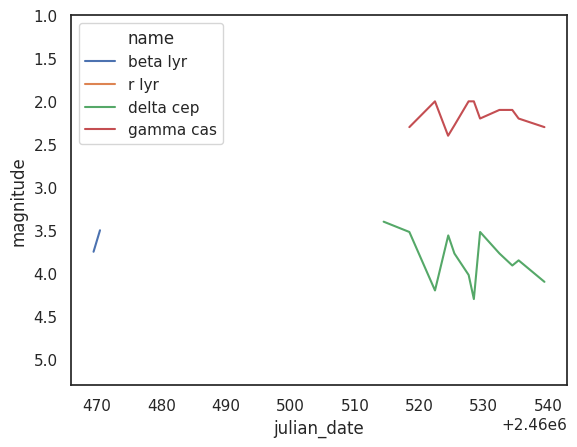

In [7]:
g = sns.lineplot(
      data=variable_measurements_df,
      x="julian_date",
      y="magnitude",
      hue="name"
      )
g.set(ylim=(variable_measurements_df["magnitude"].max()+1, variable_measurements_df["magnitude"].min()-1))

In [8]:
variable_minima_df = variable_measurements_df.loc[
    variable_measurements_df[["name","magnitude","julian_date"]].groupby("name")["magnitude"].idxmin()
][["name","magnitude","julian_date"]].set_index("name")

In [9]:
variable_minima_df

,magnitude,julian_date
name,,
beta lyr,3.5,2.460470e+06
delta cep,3.4,2.460514e+06
gamma cas,2.0,2.460522e+06
r lyr,4.0,2.460470e+06


In [10]:
variable_measurements_with_minima_df = variable_measurements_df.join(
    variable_minima_df.rename(columns={"magnitude":"minimum_magnitude", "julian_date":"minimum_julian_date"}), 
    on="name"
)

In [11]:
variable_measurements_with_minima_df["elapsed_time"] = \
    variable_measurements_with_minima_df["julian_date"] - variable_measurements_with_minima_df["minimum_julian_date"]

In [12]:
variable_measurements_with_minima_df.query("name=='gamma cas'")

,name,date,time,magnitude,comp1_magnitude,comp2_magnitude,instrument,datetime,julian_date,minimum_magnitude,minimum_julian_date,elapsed_time
4,gamma cas,26/07/2024,22:46,2.30,2.20,2.6,apm 10x50,2024-07-26 22:46:00,2.460518e+06,2.0,2.460522e+06,-3.971528
6,gamma cas,30/07/2024,22:05,2.00,1.25,2.6,apm 10x50,2024-07-30 22:05:00,2.460522e+06,2.0,2.460522e+06,0.000000
8,gamma cas,01/08/2024,23:00,2.40,2.20,2.6,apm 10x50,2024-08-01 23:00:00,2.460524e+06,2.0,2.460522e+06,2.038194
10,gamma cas,02/08/2024,22:18,2.28,2.20,2.6,apm 10x50,2024-08-02 22:18:00,2.460525e+06,2.0,2.460522e+06,3.009028
12,gamma cas,05/08/2024,03:18,2.00,2.20,2.6,apm 10x50,2024-08-05 03:18:00,2.460528e+06,2.0,2.460522e+06,5.217361
14,gamma cas,05/08/2024,22:54,2.00,2.20,2.6,apm 10x50,2024-08-05 22:54:00,2.460528e+06,2.0,2.460522e+06,6.034028
16,gamma cas,06/08/2024,22:00,2.20,2.20,2.6,apm 10x50,2024-08-06 22:00:00,2.460529e+06,2.0,2.460522e+06,6.996528
18,gamma cas,09/08/2024,22:00,2.10,2.20,2.6,apm 10x50,2024-08-09 22:00:00,2.460532e+06,2.0,2.460522e+06,9.996528
20,gamma cas,11/08/2024,22:00,2.10,2.20,2.6,apm 10x50,2024-08-11 22:00:00,2.460534e+06,2.0,2.460522e+06,11.996528
22,gamma cas,12/08/2024,21:30,2.20,2.20,2.6,apm 10x50,2024-08-12 21:30:00,2.460535e+06,2.0,2.460522e+06,12.975694


In [13]:
variable_periods_df = pd.read_csv("data/variable_periods.csv", index_col="name")

In [14]:
variable_measurements_with_minima_df = variable_measurements_with_minima_df.join(variable_periods_df,on="name")

In [15]:
variable_measurements_with_minima_df["phase"] = \
    variable_measurements_with_minima_df["elapsed_time"] / variable_measurements_with_minima_df["period"]
variable_measurements_with_minima_df["phase"] = variable_measurements_with_minima_df["phase"].apply(lambda x: math.modf(x)[0])

[(5.3, 2.4), Text(0.5, 1.0, 'Light curve for delta cep - Period = 5.366')]

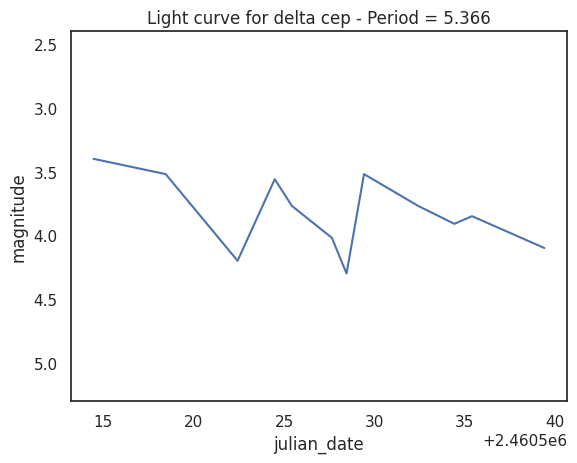

In [16]:
target = "delta cep"
target_period = variable_periods_df.loc[target]["period"]
target_df = variable_measurements_with_minima_df.query(f"name==@target")
g = sns.lineplot(
      data=target_df,
      x="julian_date",
      y="magnitude"
      )
g.set(ylim=(target_df["magnitude"].max()+1, target_df["magnitude"].min()-1),
      title=f"Light curve for {target} - Period = {target_period}")

[(5.3, 2.4), Text(0.5, 1.0, 'Phase diagram for delta cep - Period = 5.366')]

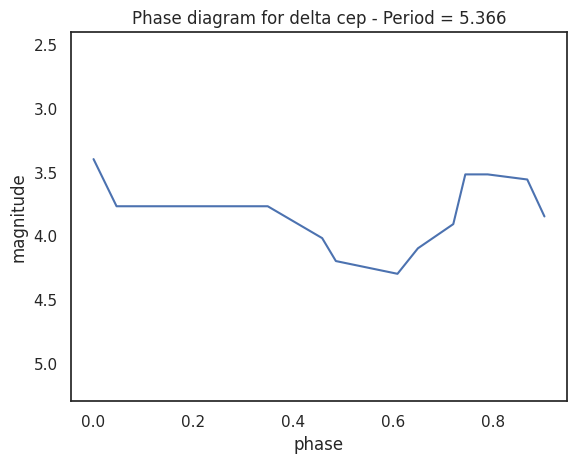

In [17]:
target = "delta cep"
target_period = variable_periods_df.loc[target]["period"]
target_df = variable_measurements_with_minima_df.query(f"name==@target")
g = sns.lineplot(
      data=target_df,
      x="phase",
      y="magnitude"
      )
g.set(ylim=(target_df["magnitude"].max()+1, target_df["magnitude"].min()-1),
      title=f"Phase diagram for {target} - Period = {target_period}")